In [21]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-06-19 20:24:47,588: Credentials are already in use. The existing account in the session will be replaced.


In [22]:
qr = QuantumRegister(3, name="q")
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

In [23]:
def protocolone():
    qc.x(0)
    qc.h(0)
    qc.barrier()
    qc.h(1)
    qc.cx(1,2)
    qc.barrier()
    qc.cx(0,1)
    qc.h(0)
    qc.barrier()
    qc.measure(0,0)
    qc.measure(1,1)
    qc.x(2).c_if(crx, 1) # Apply gates if the registers 
    qc.z(2).c_if(crz, 1) 
    qc.h(2)
    cr_result = ClassicalRegister(1)
    qc.add_register(cr_result)
    qc.measure(2,2)
    

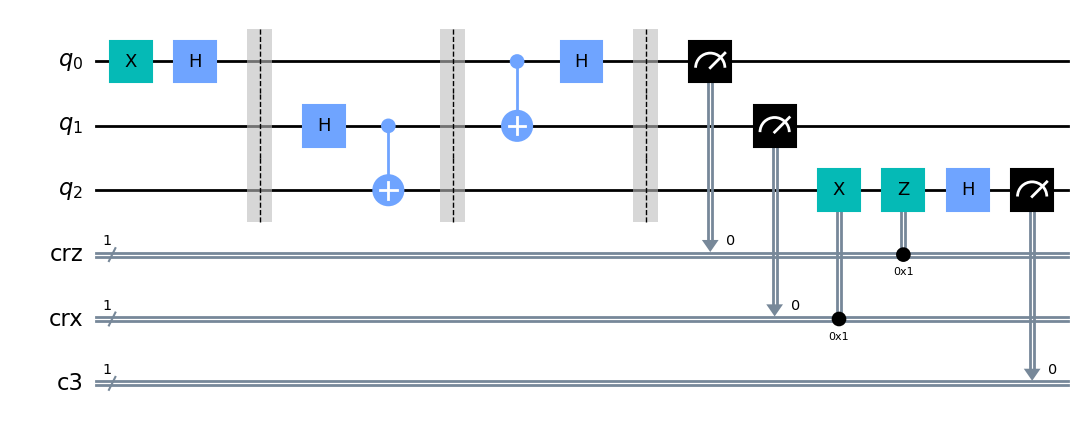

In [24]:
protocolone()
qc.draw()

In [25]:
qrr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crzz = ClassicalRegister(1, name="crz") # and 2 classical bits
crxx = ClassicalRegister(1, name="crx") # in 2 different registers
qcc = QuantumCircuit(qrr, crzz, crxx)

In [26]:
def protocoltwo():
    qcc.h(0)
    qcc.barrier()
    qcc.h(1)
    qcc.cx(1,2)
    qcc.barrier()
    qcc.cx(0,1)
    qcc.h(0)
    qcc.barrier()
    qcc.measure(0,0)
    qcc.measure(1,1)
    qcc.x(2).c_if(crxx, 1) # Apply gates if the registers 
    qcc.z(2).c_if(crzz, 1) 
    qcc.h(2)
    cr_resultt = ClassicalRegister(1)
    qcc.add_register(cr_resultt)
    qcc.measure(2,2)

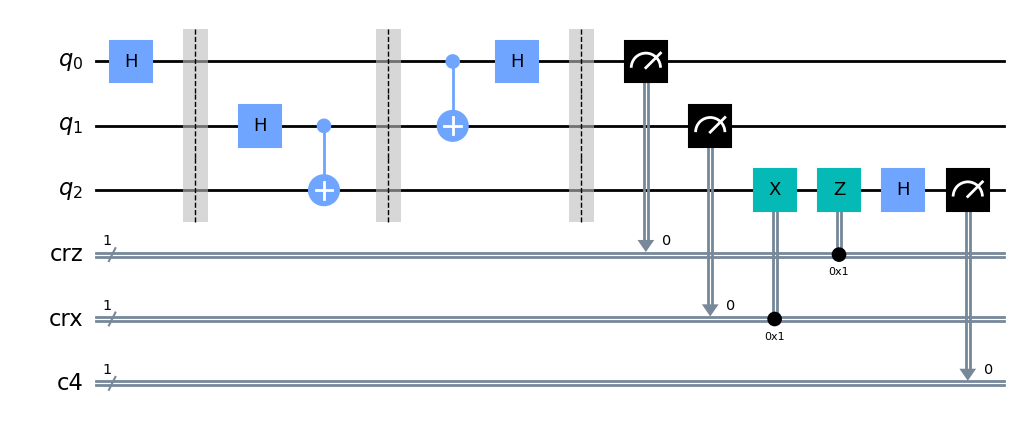

In [27]:
protocoltwo()
qcc.draw()

0110001001110010011000010110111001100101
                                  brane
[{'0': 22, '1': 18}, {'0': 19, '1': 21}, {'1': 19, '0': 21}]


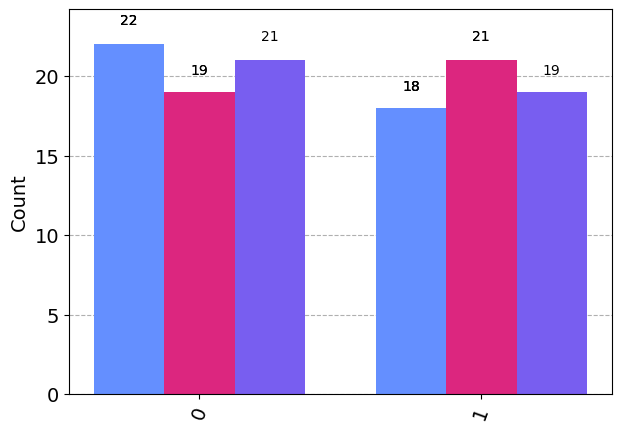

In [28]:
sim = Aer.get_backend('aer_simulator')
text="brane"
btext=''.join(format(ord(i), '08b')for i in text)
print(btext)
memorym=list(btext)
qone=list(btext)
qtwo=list(btext)
qtri=list(btext)



for i in range(len(btext)):
    if(btext[i]=="0"):
        t_qc = transpile(qcc, sim)
        result = sim.run(t_qc,shots=1, memory=True).result()
        memory = result.get_memory(t_qc)
    elif(btext[i]=="1"):
        t_qc = transpile(qc, sim)
        result = sim.run(t_qc,shots=1, memory=True).result()
        memory = result.get_memory(t_qc)
    bla=memory[0].split()
    qone[i]=bla[0]
    qtwo[i]=bla[1]
    qtri[i]=bla[2]
    
    
            
qonebo=0
qonebe=0
qtwobo=0
qtwobe=0
qtribo=0
qtribe=0
for i in range(len(btext)):
    if(qone[i]=="0"):
        qonebo=qonebo+1
    elif(qone[i]=="1"):
        qonebe=qonebe+1
    if(qtwo[i]=="0"):
        qtwobo=qtwobo+1
    elif(qtwo[i]=="1"):
        qtwobe=qtwobe+1
    if(qtri[i]=="0"):
        qtribo=qtribo+1
    elif(qtri[i]=="1"):
        qtribe=qtribe+1

        
        
otext=''.join(qone)
binary_int = int(otext, 2);
byte_number = binary_int.bit_length() + 7 // 8
binary_array = binary_int.to_bytes(byte_number, "big")
ascii_text = binary_array.decode()
print(ascii_text)



qubit_counts = [{'0': qtribo, '1': qtribe}, {'0': qtwobo,'1':qtwobe}, {'1': qonebe,'0':qonebo}]
print(qubit_counts)
plot_histogram(qubit_counts)
